In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

In [282]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36",
}
url  = "https://www.flipkart.com/search?q=apple+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=apple+mobiles%7CMobiles&requestId=74513d15-9fcc-41ea-a7e0-16499e689ee3&as-backfill=on&otracker=nmenu_sub_Electronics_0_Apple&p%5B%5D=facets.brand%255B%255D%3DApple&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3DOnePlus&page=1"

In [284]:
response = requests.get(url , headers=headers)
# response.status_code
if response.status_code == 200:
    soup = BeautifulSoup(response.text , "lxml")
    # print(soup.prettify())
    print("Done")
else:
    print("error : ",{response.status_code})

Done


In [286]:
dataset = pd.DataFrame()
mobile_details = soup.find_all('div',class_="tUxRFH")
for j in range(1,21):
    
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36",
    }
    url = "https://www.flipkart.com/search?q=apple+mobiles&page={}".format(j)

    response = requests.get(url , headers=headers)
    # response.status_code
    if response.status_code == 200:
        soup = BeautifulSoup(response.text , "lxml")
    else:
        print("error : ",{response.status_code})
    print(url)
    
    product_name = []
    product_url = []
    brand_name = []
    product_rating = []
    ratings_reviews = []
    product_discount = []
    product_delivery = []
    product_price = []
    
    for i in mobile_details:
        product = i.find('div',class_ = "KzDlHZ")
        if product:
            print(product_name.append(product.text.strip()))
        else:
            product_name.append(None)
    
        image = soup.find('img')
        image_get = image.get('src')
        if image_get:
            product_url.append(image_get)
        else:
            product_url(None)
    
        name=i.find('div',class_ = "KzDlHZ").text.strip()
        if name:
            brand_name.append(name.split()[1])
        else:
            brand_name.append(None)
    
        rating = i.find('div',class_='XQDdHH')
        if rating:
            product_rating.append(rating.text.strip())
        else:
            product_rating.append(None)
    
        rt_and_re =i.find('div',class_ = '_5OesEi')
        if rt_and_re:
            ratings_reviews.append(rt_and_re.text.strip())
        else:
            ratings_reviews.append(None)
    
        discount = i.find('div',class_='UkUFwK')
        if discount:
            product_discount.append(discount.text.strip())
        else:
            product_discount.append(None)
    
        delivery = i.find('div',class_ = 'yiggsN')
        if delivery:
            product_delivery.append(delivery.text.strip())
        else:
            product_delivery.append(None)
        price = i.find('div',class_='Nx9bqj _4b5DiR')
        if price:
            product_price.append(price.text.strip())
        else:
            product_price(None)


        dict = {
            'product_name': product_name,
            'product_url': product_url,
            'brand_name': brand_name,
            'product_rating': product_rating,
            'ratings_reviews': ratings_reviews,
            'product_discount': product_discount,
            'product_delivery': product_delivery,
            'product_price': product_price
        }
        
        data = pd.DataFrame(dict)
        print(f"Shape of data after page {j}: {data.shape}")
        dataset = pd.concat([dataset,data])
        print(f"Shape of dataset after page {j}: {dataset.shape}")



https://www.flipkart.com/search?q=apple+mobiles&page=1
None
Shape of data after page 1: (1, 8)
Shape of dataset after page 1: (1, 8)
None
Shape of data after page 1: (2, 8)
Shape of dataset after page 1: (3, 8)
None
Shape of data after page 1: (3, 8)
Shape of dataset after page 1: (6, 8)
None
Shape of data after page 1: (4, 8)
Shape of dataset after page 1: (10, 8)
None
Shape of data after page 1: (5, 8)
Shape of dataset after page 1: (15, 8)
None
Shape of data after page 1: (6, 8)
Shape of dataset after page 1: (21, 8)
None
Shape of data after page 1: (7, 8)
Shape of dataset after page 1: (28, 8)
None
Shape of data after page 1: (8, 8)
Shape of dataset after page 1: (36, 8)
None
Shape of data after page 1: (9, 8)
Shape of dataset after page 1: (45, 8)
None
Shape of data after page 1: (10, 8)
Shape of dataset after page 1: (55, 8)
None
Shape of data after page 1: (11, 8)
Shape of dataset after page 1: (66, 8)
None
Shape of data after page 1: (12, 8)
Shape of dataset after page 1: (78, 

In [288]:
dataset.to_csv("flipcart_mobile_data.csv",index = False)

In [290]:
data =  pd.read_csv("flipcart_mobile_data.csv")

In [292]:
data.isnull().sum()

product_name        0
product_url         0
brand_name          0
product_rating      0
ratings_reviews     0
product_discount    0
product_delivery    0
product_price       0
dtype: int64

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      6000 non-null   object 
 1   product_url       6000 non-null   object 
 2   brand_name        6000 non-null   object 
 3   product_rating    6000 non-null   float64
 4   ratings_reviews   6000 non-null   object 
 5   product_discount  6000 non-null   object 
 6   product_delivery  6000 non-null   object 
 7   product_price     6000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 375.1+ KB


In [296]:
data.head(5)

,product_name,product_url,brand_name,product_rating,ratings_reviews,product_discount,product_delivery,product_price
0,"Apple iPhone 15 (Black, 128 GB)",//static-assets-web.flixcart.com/fk-p-linchpin...,iPhone,4.6,"4.62,33,660 Ratings & 8,434 Reviews",12% off,Free delivery,"₹60,999"
1,"Apple iPhone 15 (Black, 128 GB)",//static-assets-web.flixcart.com/fk-p-linchpin...,iPhone,4.6,"4.62,33,660 Ratings & 8,434 Reviews",12% off,Free delivery,"₹60,999"
2,"Apple iPhone 15 Plus (Black, 128 GB)",//static-assets-web.flixcart.com/fk-p-linchpin...,iPhone,4.6,"4.637,809 Ratings & 2,173 Reviews",18% off,Free delivery,"₹64,999"
3,"Apple iPhone 15 (Black, 128 GB)",//static-assets-web.flixcart.com/fk-p-linchpin...,iPhone,4.6,"4.62,33,660 Ratings & 8,434 Reviews",12% off,Free delivery,"₹60,999"
4,"Apple iPhone 15 Plus (Black, 128 GB)",//static-assets-web.flixcart.com/fk-p-linchpin...,iPhone,4.6,"4.637,809 Ratings & 2,173 Reviews",18% off,Free delivery,"₹64,999"


In [298]:
data[['rating','review']] = data['ratings_reviews'].str.split('&',expand= True)

In [300]:
data['rating'] =  data['rating'].str.extract(r'([\d,.]+)',expand = False)
data['review'] = data['review'].str.extract(r'([\d,.]+)',expand = False)

In [310]:
data[['discount','label']] =  data['product_discount'].str.split('%',expand=True)

In [318]:
split_data = data['product_price'].str.split('₹', expand=True)
print(split_data.head())
data['price'] = split_data[1]

  0       1
0    60,999
1    60,999
2    64,999
3    60,999
4    64,999


In [324]:
data['rating'] = data['rating'].str.replace(',' , '') 
data['review'] = data['review'].str.replace(',' , '') 
data['price'] = data['price'].str.replace(',', '')

In [334]:
data = data.drop(['product_url','ratings_reviews','product_discount','label','product_price'],axis = 'columns')

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      6000 non-null   object 
 1   brand_name        6000 non-null   object 
 2   product_rating    6000 non-null   float64
 3   product_delivery  6000 non-null   object 
 4   rating            6000 non-null   object 
 5   review            6000 non-null   object 
 6   discount          6000 non-null   object 
 7   price             6000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 375.1+ KB


In [350]:
data['rating'] =  pd.to_numeric(data['rating'], errors='coerce')
data['review'] =  pd.to_numeric(data['review'], errors='coerce')
data['discount'] = pd.to_numeric(data['discount'], errors='coerce')
data['price'] = pd.to_numeric(data['price'],errors='coerce')


data['rating'] =  data['rating'].fillna(0.0)
data['review'] =  data['review'].fillna(0).astype(int)
data['discount'] = data['discount'].fillna(0).astype(int)
data['price'] =  data['price'].fillna(0).astype(int)

data_dict = {
    'product_name':object,
    'brand_name':object,
    'product_delivery':object,
    'rating': float,
    'review': int,
    'discount':int, 
    'price':int
}

data = data.astype(data_dict)

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      6000 non-null   object 
 1   brand_name        6000 non-null   object 
 2   product_rating    6000 non-null   float64
 3   product_delivery  6000 non-null   object 
 4   rating            6000 non-null   float64
 5   review            6000 non-null   int32  
 6   discount          6000 non-null   int32  
 7   price             6000 non-null   int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 304.8+ KB


In [354]:
data.describe()

,product_rating,rating,review,discount,price
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.563667,4.592281,2238.653333,12.273333,73426.186667
std,0.260495,0.265813,3217.418535,8.421230,20269.285847
min,3.300000,3.310000,0.000000,4.000000,18799.000000
25%,4.600000,4.617360,69.000000,7.000000,64999.000000
50%,4.600000,4.623366,69.000000,8.000000,72900.000000
75%,4.600000,4.637809,2173.000000,18.000000,82900.000000
max,4.700000,4.758100,8434.000000,47.000000,137900.000000


# What is top 5 rated mobile on flipcart

In [356]:
Top_rated = data.sort_values(by = ['rating','review'],ascending = False).head(5)

In [358]:
Top_rated

,product_name,brand_name,product_rating,product_delivery,rating,review,discount,price
77,"Apple iPhone 16 Pro (Black Titanium, 128 GB)",iPhone,4.7,Free delivery,4.7581,36,5,112900
89,"Apple iPhone 16 Pro (Black Titanium, 128 GB)",iPhone,4.7,Free delivery,4.7581,36,5,112900
102,"Apple iPhone 16 Pro (Black Titanium, 128 GB)",iPhone,4.7,Free delivery,4.7581,36,5,112900
116,"Apple iPhone 16 Pro (Black Titanium, 128 GB)",iPhone,4.7,Free delivery,4.7581,36,5,112900
131,"Apple iPhone 16 Pro (Black Titanium, 128 GB)",iPhone,4.7,Free delivery,4.7581,36,5,112900


# Are there any products with high ratings but low reviews?

In [171]:
data.head()

,product_name,brand_name,product_rating,product_delivery,rating,review,discount
0,"Apple iPhone 15 (Black, 128 GB)",iPhone,4.6,Free delivery,4.623334,8414,12
1,"Apple iPhone 15 (Black, 128 GB)",iPhone,4.6,Free delivery,4.623334,8414,12
2,"Apple iPhone 15 Plus (Green, 128 GB)",iPhone,4.6,Free delivery,4.637664,2164,18
3,"Apple iPhone 15 (Black, 128 GB)",iPhone,4.6,Free delivery,4.623334,8414,12
4,"Apple iPhone 15 Plus (Green, 128 GB)",iPhone,4.6,Free delivery,4.637664,2164,18


In [362]:
def high_rating_low_reviews(data,x,y):
    try:
        result = data[(data['product_rating']>= x) & (data['review'] < y)]
        return result
    except KeyError as err:
        print(f"KeyError : {err}. ensure 'rating' and 'review' columns exist in the dataset")
    except Exception as e:
        print(f"An error occurs : {e}")

In [370]:
filtered_data = high_rating_low_reviews(data, 4.5, 100)
filtered_data.head(5)

,product_name,brand_name,product_rating,product_delivery,rating,review,discount,price
20,"Apple iPhone 16 (Black, 128 GB)",iPhone,4.6,Free delivery,4.61736,69,8,72900
26,"Apple iPhone 16 (Black, 128 GB)",iPhone,4.6,Free delivery,4.61736,69,8,72900
27,"Apple iPhone 16 (White, 128 GB)",iPhone,4.6,Free delivery,4.61736,69,8,72900
33,"Apple iPhone 16 (Black, 128 GB)",iPhone,4.6,Free delivery,4.61736,69,8,72900
34,"Apple iPhone 16 (White, 128 GB)",iPhone,4.6,Free delivery,4.61736,69,8,72900


# Find the Relationship between Rating & Price

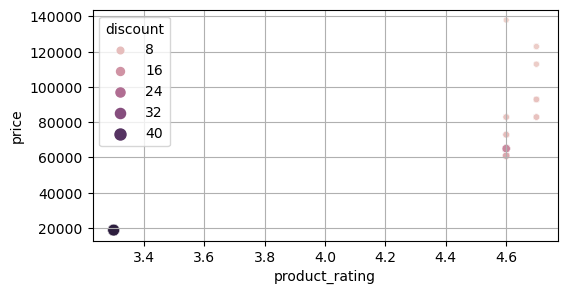

In [384]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x='product_rating',y='price',size='discount',hue = 'discount')
plt.xtitle = 'product_price'
plt.ytitle = 'product_rating'
plt.title = 'Relatonship between price & rating'
plt.grid()
plt.show()

# most_expensive & leasted_expensive mobile on flipcart

In [392]:
most_expensive = data.loc[(data['price']).idxmax()]
least_expensive = data.loc[(data['price']).idxmin()]

In [402]:
print(most_expensive['product_name'])
print(least_expensive['product_name'])

Apple iPhone 16 Pro Max (Desert Titanium, 256 GB)
(Refurbished) SAMSUNG Galaxy F54 5G (Meteor Blue, 256 GB)


# Which brands have the highest average product ratings, and do they also have a higher number of reviews compared to others?

In [411]:
data.head(3)

,product_name,brand_name,product_rating,product_delivery,rating,review,discount,price
0,"Apple iPhone 15 (Black, 128 GB)",iPhone,4.6,Free delivery,4.623366,8434,12,60999
1,"Apple iPhone 15 (Black, 128 GB)",iPhone,4.6,Free delivery,4.623366,8434,12,60999
2,"Apple iPhone 15 Plus (Black, 128 GB)",iPhone,4.6,Free delivery,4.637809,2173,18,64999


In [457]:
analysis = data.groupby('brand_name').agg({
    'product_rating': 'mean',
     'review': 'sum'
}).reset_index()
print(analysis)

  brand_name  product_rating    review
0    SAMSUNG        3.300000         0
1     iPhone        4.616319  13431920


In [459]:
brand_analysis = analysis.sort_values(by = ['product_rating'],ascending = False)
print(brand_analysis)

  brand_name  product_rating    review
1     iPhone        4.616319  13431920
0    SAMSUNG        3.300000         0


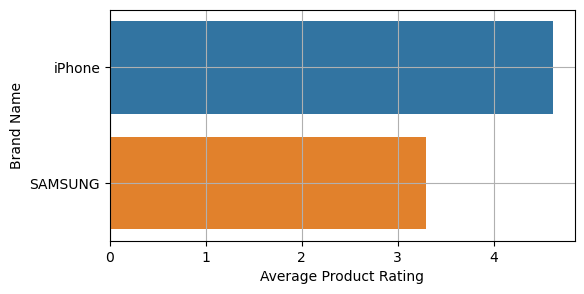

In [471]:
plt.figure(figsize=(6,3))
sns.barplot(data=brand_analysis,x='product_rating',y='brand_name')
plt.xlabel('Average Product Rating')
plt.ylabel('Brand Name')
plt.grid()